## Restaurant-And-Food-Inspections

<p>The Food we eat plays a big factor to deciding how healthy we live ever after. This analysis is geared towards restaurants and how higienic their services are. Using data analysis method provided in R we will be drawing insights to see how far the data collected on restaurants at random locations will help predict how healthy the food we eat are..</p>

<p>In this project we will analyze the spartial overview of food access indicators </p>

<img src = "https://t3.ftcdn.net/jpg/02/27/62/24/360_F_227622470_sJ3yEaz44RK7UrWNaGdSn7azgeRu9UDs.jpg" alt="Food"/>

### Data Columns
<ol>
    <li><b>business_id: Unique identifier for the business. For many cities, this may be the license number.</b></li>
        <li><b>business_name :Common name of the business.</b></li>
        <li><b>business_address: Street address of the business.Example: 706 Mission St.</b></li>
        <li><b>business_city: City of the business. This field must be included if the file contains businesses from multiple cities.

 </b></li>
        <li><b>business_state: State or province for the business. In the U.S. this should be the two-letter code for the state. </b> </li>
        <li><b>business_postal_code: Zip code or other postal code.</b></li>
        <li><b>business_phone_number: Phone number for a business including country specific dialing information.
Example: +14159083801</b></li>
        <li><b>inspection_date: </b></li>
        <li><b>inspection_score: Calculated inspection score, may be either graded (0-5, 0-100), or cumulative, and this should be defined in your feed metadata.</b></li>
        <li><b>inspection_description: Single line description containing details on the outcome of an inspection</b></li>
        <li><b>inspection_type: String representing the type of inspection.
Must be one of: initial, routine, follow-up, complaint</b></li>
        <li><b>violation_descriptionOne line description of the violation.</b></li>
        <li><b>violation_code: Code for the violation. It is recommended that this be based on the FDA Food Code. However, municipalities can decide to use pre-existing codes for this field.</b></li>
        <li><b>business_location: Address of the business</b></li>
</ol>

    


In [1]:
# loading the needed library
library(ggplot2)
library(tidyverse)
library(lubridate)
library(tidyr)
#library(heatmaply)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1       ✔ purrr   0.3.2  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
# Loading the data
df <- read.csv("https://query.data.world/s/2kuh5d77w22kymfw37kwpbvnyy6hxd?dws=00000", header=TRUE, stringsAsFactors=FALSE);

Great! Now let's get a quick look with head() and check out the structure with dim()

In [3]:
df %>%
dim()

head(df)

[1] 45006    14

business_id,business_name,business_address,business_city,business_state,business_postal_code,business_phone_number,inspection_date,inspection_score,inspection_description,inspection_type,violation_description,violation_code,business_location
FA0005362 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0005362/PR0005337),MCGINLEYS PUB,645 G ST,ANCHORAGE,AK,99501,9072791782,03/07/2017,94,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",0008,"645 G ST ANCHORAGE, AK 99501 (61.2157799112, -149.8954625568)"
FA0000274 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0000274/PR0000274),VILLAGE INN #1,1130 E NORTHERN LIGHTS BLVD,ANCHORAGE,AK,995084219,9072796013,10/21/2015,86,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,0001,"1130 E NORTHERN LIGHTS BLVD ANCHORAGE, AK 995084219 (61.1951723449, -149.8613174714)"
FA0007874 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0007874/PR0007823),RONNIE SUSHI 2,924 MULDOON RD,ANCHORAGE,AK,99504,9073380001,11/22/2016,80,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,0034,"924 MULDOON RD ANCHORAGE, AK 99504 (61.2138789468, -149.7335368102)"
FA0001485 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0001485/PR0001485),FRED MEYER - RETAIL FISH,1000 E NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,NA,12/23/2003,96,NO ACTION,Regular,,,"1000 E NORTHERN LIGHTS BLVD ANCHORAGE, AK 99503 (61.1952224623, -149.8649503988)"
FA0009047 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0009047/PR0008958),PHO GRILL,8809 JEWEL LAKE RD,ANCHORAGE,AK,99502,9078681881,07/13/2017,83,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,0007,"8809 JEWEL LAKE RD ANCHORAGE, AK 99502 (61.140308886, -149.9518697271)"
FA0003387 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0003387/PR0003382),TACO KING #2,1330 E HUFFMAN RD,ANCHORAGE,AK,99515,9073446714,09/10/2008,95,NO ACTION,Regular,"12 HANDS CLEAN, GOOD HYGIENE, CERTIFICATION",0012,"1330 E HUFFMAN RD ANCHORAGE, AK 99515 (61.1086219671, -149.8575388547)"


There are 45006 rows and  14 columns 

In [4]:
# Have a glimpse of columns info
glimpse(df)

Observations: 45,006
Variables: 14
$ business_id            <chr> "FA0005362 (https://anchorageonline.envisionco…
$ business_name          <chr> "MCGINLEYS PUB", "VILLAGE INN #1", "RONNIE SUS…
$ business_address       <chr> "645 G ST", "1130 E NORTHERN LIGHTS BLVD", "92…
$ business_city          <chr> "ANCHORAGE", "ANCHORAGE", "ANCHORAGE", "ANCHOR…
$ business_state         <chr> "AK", "AK", "AK", "AK", "AK", "AK", "AK", "AK"…
$ business_postal_code   <int> 99501, 995084219, 99504, 99503, 99502, 99515, …
$ business_phone_number  <dbl> 9072791782, 9072796013, 9073380001, NA, 907868…
$ inspection_date        <chr> "03/07/2017", "10/21/2015", "11/22/2016", "12/…
$ inspection_score       <int> 94, 86, 80, 96, 83, 95, NA, NA, NA, NA, 94, 10…
$ inspection_description <chr> "SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS"…
$ inspection_type        <chr> "Regular", "Regular", "Regular", "Regular", "R…
$ violation_description  <chr> "HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",…
$ violation_code 

In [5]:
# CHecking to see how many states data were gotten from
unique(df$business_state )

[1] "AK" "S"

In [6]:
# lets do same for cities
unique(df$business_city )

[1] "ANCHORAGE"     "EAGLE RIVER"   "CHUGIAK"       "GIRDWOOD"     
 [5] "INDIAN"        "FT RICHARDSON" "JBER"          "WASILLA"      
 [9] "PORTAGE"       "PALMER"

In [11]:
df %>%
filter(inspection_date >="03/07/2017", inspection_date <= "11/07/2018") %>%
head()

df%>%
count(inspection_type)

business_id,business_name,business_address,business_city,business_state,business_postal_code,business_phone_number,inspection_date,inspection_score,inspection_description,inspection_type,violation_description,violation_code,business_location
FA0005362 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0005362/PR0005337),MCGINLEYS PUB,645 G ST,ANCHORAGE,AK,99501,9072791782,03/07/2017,94,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",0008,"645 G ST ANCHORAGE, AK 99501 (61.2157799112, -149.8954625568)"
FA0000274 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0000274/PR0000274),VILLAGE INN #1,1130 E NORTHERN LIGHTS BLVD,ANCHORAGE,AK,995084219,9072796013,10/21/2015,86,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,0001,"1130 E NORTHERN LIGHTS BLVD ANCHORAGE, AK 995084219 (61.1951723449, -149.8613174714)"
FA0009047 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0009047/PR0008958),PHO GRILL,8809 JEWEL LAKE RD,ANCHORAGE,AK,99502,9078681881,07/13/2017,83,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,0007,"8809 JEWEL LAKE RD ANCHORAGE, AK 99502 (61.140308886, -149.9518697271)"
FA0003387 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0003387/PR0003382),TACO KING #2,1330 E HUFFMAN RD,ANCHORAGE,AK,99515,9073446714,09/10/2008,95,NO ACTION,Regular,"12 HANDS CLEAN, GOOD HYGIENE, CERTIFICATION",0012,"1330 E HUFFMAN RD ANCHORAGE, AK 99515 (61.1086219671, -149.8575388547)"
FA0003022 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0003022/PR0003019),MCLAUGHLIN YOUTH CENTER,2600 PROVIDENCE DR,ANCHORAGE,AK,99508,9072694316,04/18/2012,NA,NO ACTION,Regular,"PLUMBING INSTALLED, PROPER BACKFLOW DEVICES",0049,"2600 PROVIDENCE DR ANCHORAGE, AK 99508 (61.1879321325, -149.8321596484)"
FA0010756 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0010756/PR0010645),AJ'S RIB-A-GO-GO,8640 LAKE OTIS PKWY,ANCHORAGE,AK,99507,9078840558,06/06/2017,94,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,0001,"8640 LAKE OTIS PKWY ANCHORAGE, AK 99507 (61.1420292774, -149.8342459299)"


inspection_type,n
C/R - INACTIVE CODE,72
Change of Ownership,958
Complaint,1871
Enforcement,280
FBI - INACTIVE CODE,58
FOLLOW-UP,45
FU - INACTIVE CODE,24
HACCP - INACTIVE,101
OB - INACTIVE CODE,10
Opening,1301


There are fourteen inspection_types and the most used is the regular

In [13]:
# Searching for columns with missing data
df %>% 
is.na()%>% 
apply(MARGIN=2, FUN=sum)

business_id          business_name       business_address 
                     0                      0                      0 
         business_city         business_state   business_postal_code 
                     0                      0                      0 
 business_phone_number        inspection_date       inspection_score 
                 13227                      0                  17828 
inspection_description        inspection_type  violation_description 
                     0                      0                      0 
        violation_code      business_location 
                     0                      0

Business phone number has 13227 missing datas while inspection score has 17828 missing data

using heatmap to view the correlation between this missing datas

In [14]:
# How many missing datas are there?
df %>%
is.na()%>%
sum() 

[1] 31055

In [16]:
# lets explore some correlation by loading corr library
library(heatmaply)

ERROR: Error in library(heatmaply): there is no package called ‘heatmaply’


In [ ]:
heatmaply_na(
  airquality[1:30, ],
  showticklabels = c(TRUE, FALSE),
  k_col = 3,
  k_row = 3
)


In [21]:
#filling missing values for inspection_score and business_phone_number
df <- df %>% fill(inspection_score, .direction="down")
df <- df %>% fill(business_phone_number, .direction="down")

# How many missing datas are there?
df %>% 
is.na()%>% 
apply(MARGIN=2, FUN=sum)

business_id          business_name       business_address 
                     0                      0                      0 
         business_city         business_state   business_postal_code 
                     0                      0                      0 
 business_phone_number        inspection_date       inspection_score 
                     0                      0                      0 
inspection_description        inspection_type  violation_description 
                     0                      0                      0 
        violation_code      business_location 
                     0                      0

In [23]:
df %>% 
is.na()%>%
sum() 

[1] 0

In [112]:
# Selecting columns i will be working with for my analysis
working_df <- df %>%
select(business_id, business_city, business_state, inspection_score, violation_description, inspection_type)%>%
arrange(business_id)

working_df %>% head()

business_id,business_city,business_state,inspection_score,violation_description,inspection_type
FA0000004 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0000004/PR0000004),EAGLE RIVER,AK,100,DEMONSTRATION OF KNOWLEDGE,Regular
FA0000004 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0000004/PR0000004),EAGLE RIVER,AK,97,"SINGLE-SERVICE ITEMS PROPERLY STORED, USED",Regular
FA0000004 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0000004/PR0000004),EAGLE RIVER,AK,99,"24 STORAGE, HANDLING OF CLEAN EQUIPMENT/UTENSILS",Regular
FA0000004 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0000004/PR0000004),EAGLE RIVER,AK,95,,Complaint
FA0000004 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0000004/PR0000004),EAGLE RIVER,AK,100,"TOXIC SUBSTANCES PROPERLY IDENTIFIED, STORED, USED",Regular
FA0000004 (https://anchorageonline.envisionconnect.com/#/pa1/detail/FA0000004/PR0000004),EAGLE RIVER,AK,97,PROPER DATE MARKING AND DISPOSITION,Regular


## Visualisation

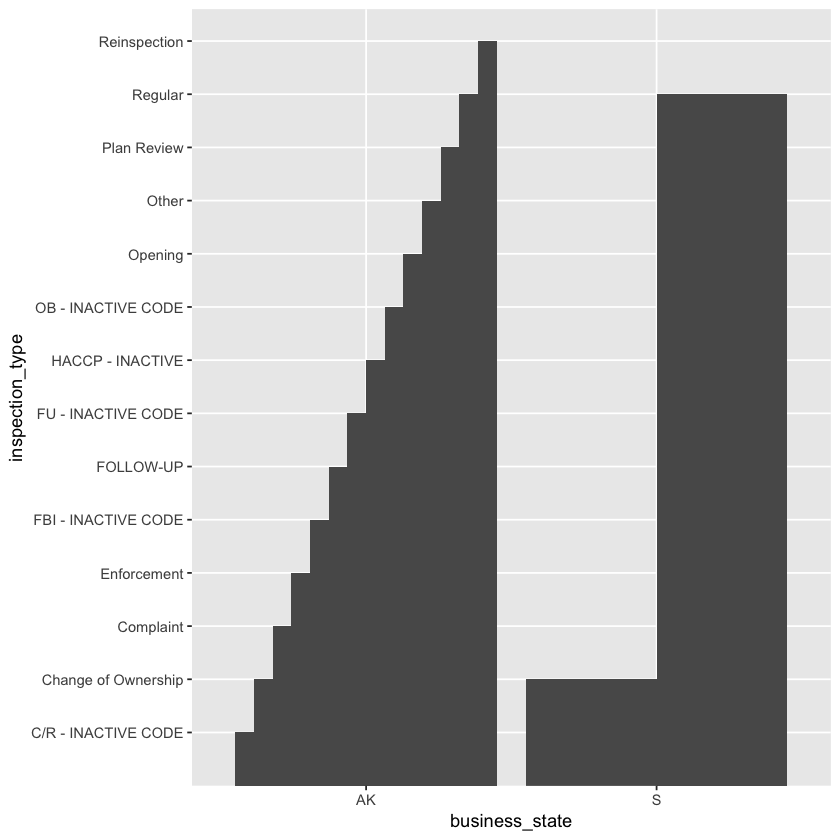

In [28]:
df %>%
ggplot(aes(business_state, inspection_type))+
geom_bar(stat="identity", position="dodge")

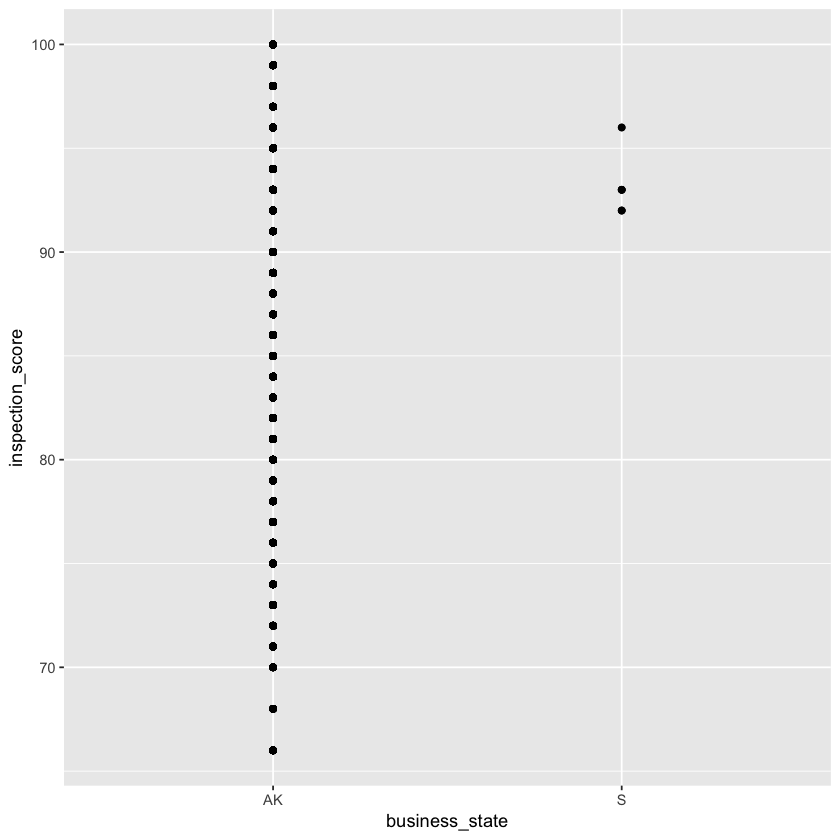

In [38]:
df %>%
ggplot(aes(business_state, inspection_score))+
geom_point()

In [39]:
df %>%
filter(inspection_score )%>%
count(inspection_score, score = ifelse)

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: df %>%
   ^
